# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

## Load the Data

In [240]:
df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [241]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [242]:
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [243]:
df.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
26930,435530.0,280260.0,-1.478998,52.419153,20,2.0,4,1.0,25/04/2011,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2011
6644,426910.0,492910.0,-1.587687,54.331061,12,3.0,1,1.0,21/07/2007,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,2.0,Yes,2007
29914,481230.0,263300.0,-0.811226,52.261840,34,3.0,2,1.0,29/06/2006,5,...,3,5076,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2006
45930,327620.0,674310.0,-3.160815,55.956382,95,3.0,2,1.0,14/08/2013,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
34908,510180.0,197230.0,-0.408374,51.663009,41,3.0,4,2.0,07/02/2012,3,...,6,436,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [245]:
df.shape

(52000, 26)

In [246]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [247]:
df.duplicated().sum()

43

In [248]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [249]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
  upper_limit = df[col].mean() + 3 * df[col].std()
  lower_limit = df[col].mean() - 3 * df[col].std()
  df2 = df[(df[col] < upper_limit) & (df[col] > lower_limit)]

In [250]:
print('The data before remove outliers: ', len(df))
print('The data after remove outliers: ', len(df2))

The data before remove outliers:  52000
The data after remove outliers:  52000


In [251]:
df = df2

In [253]:
df['Accident_Severity'].fillna(df['Accident_Severity'].mean(), inplace=True)
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(), inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean(), inplace=True)
df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0], inplace=True)

In [254]:
for col in df.columns:
  print(df[col].unique())

[560530. 508860. 314460. ... 423266. 475125. 456682.]
[103950. 187170. 169130. ... 393153. 319380. 127058.]
[ 0.277298 -0.430574 -3.231459 ...  0.012032 -1.485264 -1.212104]
[50.812789 51.572846 51.414661 ... 51.252055 52.902301 51.56505 ]
[47  1 62  4 21 33 10 98 16 20  7 13  6 42 12  5 41 32 43 45 46 36 35 97
 55 95 22 40 44 30 54 31 17 37 50 34 48 23 52 53 14 92 93 63  3 96 60 91
 11 94 61]
[3.        1.        2.8371454 2.       ]
[ 1  2  3  4  6  7  5 10  9  8 11 12 34]
[ 1.          2.          3.          1.35475578  4.          9.
  7.          8.          5.          6.         42.         14.
 12.         10.         13.         24.         51.         18.
 11.         23.        ]
['27/11/2009' '10/10/2010' '14/09/2005' ... '24/03/2013' '25/02/2009'
 '03/02/2013']
[6 1 4 7 3 5 2]
[556  26 746  84 257 363 146 148 917 228 307 129 203 112 462 206 182  20
 364 306  32 742  90 563 433 355 471 517 150  10 102 109   6 544 406  85
 394 926 438 309 645 923 400 186 270 421 539 500 496

In [255]:
scaler = MinMaxScaler()

for col in df.select_dtypes(include=['float64', 'int64']).columns:
  df.loc[:, col] = scaler.fit_transform(df[[col]])

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [256]:
new_df = df[
    ['Location_Easting_OSGR',
    'Location_Northing_OSGR',
    'Longitude',
    'Latitude',
    'Local_Authority_(District)',
    '1st_Road_Class',
    '1st_Road_Number',
    'Road_Type',
    '2nd_Road_Class',
    '2nd_Road_Number',
    'Urban_or_Rural_Area'
]]

In [257]:
new_df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
0,0.830308,0.071670,0.829304,0.073596,0.590426,0.4,0.002200,Dual carriageway,0.000000,0.0001,0.5
1,0.737457,0.141906,0.747459,0.144705,0.026596,0.6,0.046605,Single carriageway,1.000000,0.0001,0.0
2,0.388118,0.126681,0.423616,0.129905,0.792553,1.0,0.000000,Single carriageway,0.571429,0.4056,0.0
3,0.437069,0.328559,0.464044,0.331396,0.088298,1.0,0.000000,One way street,1.000000,0.0001,0.0
4,0.517553,0.279406,0.542525,0.282705,0.272340,1.0,0.000000,Single carriageway,0.000000,0.0001,0.0


In [258]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location_Easting_OSGR       52000 non-null  float64
 1   Location_Northing_OSGR      52000 non-null  float64
 2   Longitude                   52000 non-null  float64
 3   Latitude                    52000 non-null  float64
 4   Local_Authority_(District)  52000 non-null  float64
 5   1st_Road_Class              52000 non-null  float64
 6   1st_Road_Number             52000 non-null  float64
 7   Road_Type                   52000 non-null  object 
 8   2nd_Road_Class              52000 non-null  float64
 9   2nd_Road_Number             52000 non-null  float64
 10  Urban_or_Rural_Area         52000 non-null  float64
dtypes: float64(10), object(1)
memory usage: 4.4+ MB


In [259]:
new_df['Road_Type'].value_counts()

,count
Road_Type,
Single carriageway,38852
Dual carriageway,7737
Roundabout,3475
One way street,1099
Slip road,542
Unknown,295


In [260]:
new_df['Road_Type'].replace('Unknown', new_df['Road_Type'].mode()[0], inplace=True)

<ipython-input-260-d7c42fc88751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Road_Type'].replace('Unknown', new_df['Road_Type'].mode()[0], inplace=True)


In [261]:
new_df['Road_Type'].value_counts()

,count
Road_Type,
Single carriageway,39147
Dual carriageway,7737
Roundabout,3475
One way street,1099
Slip road,542


# Encoding

In [262]:
label_encoder = LabelEncoder()

new_df['Road_Type'] = label_encoder.fit_transform(new_df['Road_Type'])

<ipython-input-262-c40563ec58e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Road_Type'] = label_encoder.fit_transform(new_df['Road_Type'])


In [263]:
new_df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
0,0.830308,0.071670,0.829304,0.073596,0.590426,0.4,0.002200,0,0.000000,0.0001,0.5
1,0.737457,0.141906,0.747459,0.144705,0.026596,0.6,0.046605,3,1.000000,0.0001,0.0
2,0.388118,0.126681,0.423616,0.129905,0.792553,1.0,0.000000,3,0.571429,0.4056,0.0
3,0.437069,0.328559,0.464044,0.331396,0.088298,1.0,0.000000,1,1.000000,0.0001,0.0
4,0.517553,0.279406,0.542525,0.282705,0.272340,1.0,0.000000,3,0.000000,0.0001,0.0
...,...,...,...,...,...,...,...,...,...,...,...
51995,0.676835,0.253488,0.694569,0.256406,0.387234,0.4,0.060706,3,1.000000,0.6486,0.0
51996,0.643692,0.091173,0.659315,0.094856,0.532979,0.4,0.027203,3,0.000000,0.0001,0.5
51997,0.794332,0.112434,0.798633,0.114692,0.547872,0.8,0.008501,3,1.000000,0.0001,0.0
51998,0.604227,0.265827,0.625514,0.269085,0.342553,0.8,0.008101,3,0.857143,0.0082,0.0


# Scalling

In [264]:
scaler = MinMaxScaler()

for col in new_df.columns:
  new_df.loc[:, col] = scaler.fit_transform(new_df[[col]])

new_df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
0,0.830308,0.071670,0.829304,0.073596,0.590426,0.4,0.002200,0.00,0.000000,0.0001,0.5
1,0.737457,0.141906,0.747459,0.144705,0.026596,0.6,0.046605,0.75,1.000000,0.0001,0.0
2,0.388118,0.126681,0.423616,0.129905,0.792553,1.0,0.000000,0.75,0.571429,0.4056,0.0
3,0.437069,0.328559,0.464044,0.331396,0.088298,1.0,0.000000,0.25,1.000000,0.0001,0.0
4,0.517553,0.279406,0.542525,0.282705,0.272340,1.0,0.000000,0.75,0.000000,0.0001,0.0
...,...,...,...,...,...,...,...,...,...,...,...
51995,0.676835,0.253488,0.694569,0.256406,0.387234,0.4,0.060706,0.75,1.000000,0.6486,0.0
51996,0.643692,0.091173,0.659315,0.094856,0.532979,0.4,0.027203,0.75,0.000000,0.0001,0.5
51997,0.794332,0.112434,0.798633,0.114692,0.547872,0.8,0.008501,0.75,1.000000,0.0001,0.0
51998,0.604227,0.265827,0.625514,0.269085,0.342553,0.8,0.008101,0.75,0.857143,0.0082,0.0


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

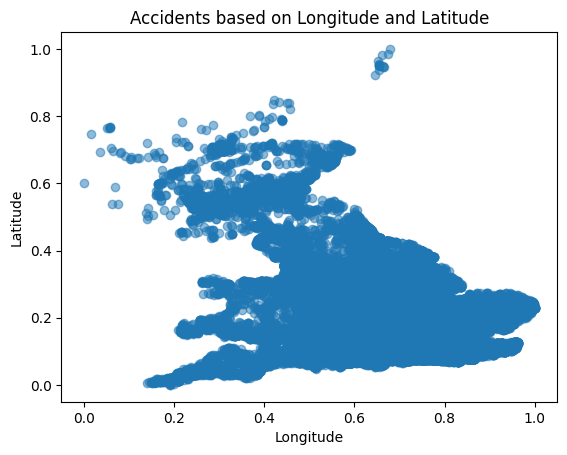

In [265]:
plt.scatter(new_df['Longitude'], new_df['Latitude'], alpha=0.5)
plt.title('Accidents based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [266]:
pca = PCA(n_components=0.9)

data_pca = pca.fit_transform(new_df)

n_components = data_pca.shape[1]
pca_df = pd.DataFrame(data=data_pca, columns=[f'PC{i+1}' for i in range(n_components)])

print(pca_df)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7
0      0.693842  0.455572  0.150514  0.035752  0.524656  0.054654  0.094453
1     -0.557368  0.186840 -0.288372 -0.058722 -0.037136  0.004873 -0.083457
2     -0.107727 -0.548862  0.188093  0.170117  0.184752 -0.201554  0.007983
3     -0.505925  0.001693  0.027884  0.560120 -0.030091  0.340697  0.062873
4      0.381524 -0.408111 -0.343682  0.266437 -0.081977  0.030151 -0.060261
...         ...       ...       ...       ...       ...       ...       ...
51995 -0.505398  0.154428  0.093785 -0.120822 -0.095039 -0.204022 -0.029671
51996  0.591975 -0.001699  0.007466 -0.363651  0.115019 -0.041021 -0.085395
51997 -0.524860 -0.115294 -0.064232 -0.059297  0.333071 -0.157112 -0.080431
51998 -0.397469 -0.161664 -0.067590  0.081525  0.001979  0.004141 -0.105182
51999  0.591319 -0.005587  0.012766 -0.348768  0.066688 -0.016856 -0.079005

[52000 rows x 7 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

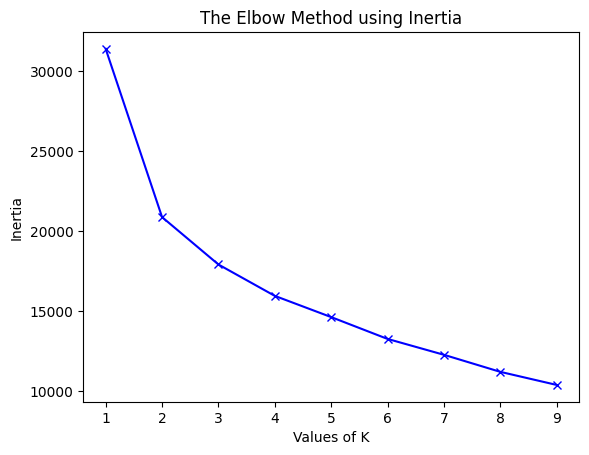

In [267]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)

    distortions.append(sum(np.min(cdist(data_pca, kmeans.cluster_centers_,'euclidean'), axis=1)) / data_pca.shape[0])
    inertias.append(kmeans.inertia_)

    mapping1[k] = sum(np.min(cdist(data_pca, kmeans.cluster_centers_,'euclidean'), axis=1)) / data_pca.shape[0]
    mapping2[k] = kmeans.inertia_

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [268]:
labels = kmeans.labels_
silhouette_score = metrics.silhouette_score(data_pca, labels)
print(f'Silhouette Coefficient : %0.2f' %silhouette_score)

Silhouette Coefficient : 0.27


## Plot the data points with their predicted cluster center

In [269]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[-0.32229089 -0.33509672  0.574512    0.05322618 -0.00619543 -0.07332297
  -0.06363031]
 [ 0.59902593 -0.45948963  0.41552215  0.03417022 -0.08874882 -0.06495735
  -0.06137984]
 [-0.39016835  0.18910131 -0.08203857 -0.07490135 -0.12429957 -0.13366699
  -0.04466802]
 [-0.21272786  0.50284344  0.21191145  0.32338743  0.12895861  0.0620768
   0.10800709]
 [-0.50976538 -0.19342603 -0.14221777  0.1013123   0.08795649  0.08648515
   0.01064719]
 [ 0.50768236 -0.01297182 -0.16694598 -0.18030536 -0.08484792 -0.04101012
  -0.00956598]
 [-0.24024298  0.08301289  0.17253807 -0.33580051  0.02957948  0.1636739
   0.05517689]
 [ 0.41271239 -0.33690237 -0.34155497  0.13259057  0.073087    0.02427355
   0.02724194]
 [ 0.65480843  0.52044586  0.18640635  0.19890135  0.11071656  0.05483532
   0.01517204]]


In [270]:
pca_df['Cluster'] = kmeans.predict(data_pca)

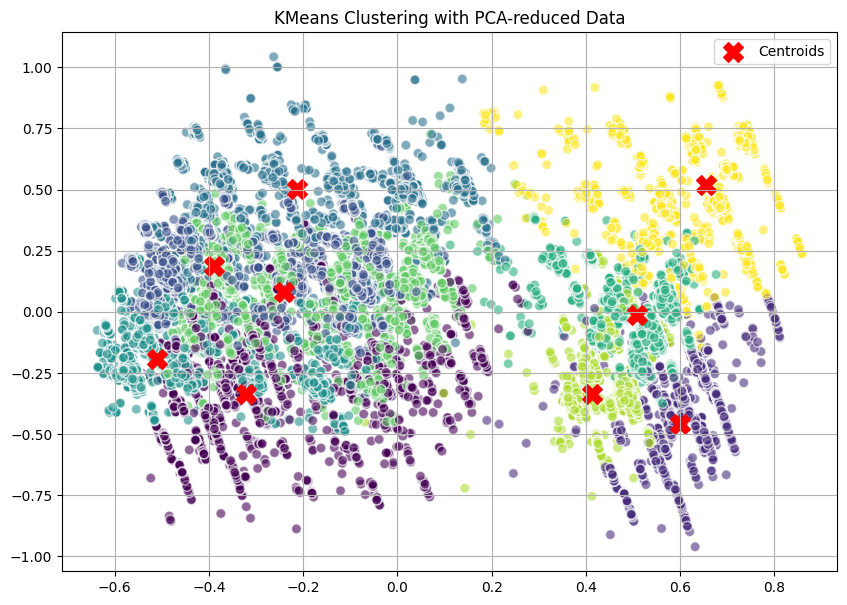

In [271]:
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6, edgecolors='w')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering with PCA-reduced Data")
plt.legend()
plt.grid(True)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

## Exam Answers

**Feature Selection:** I selected only features related to geographic data to be clustered based on spatial characteristics.

**Number of Clusters:** I used Elbow method to determine the optimal numbe.

**Evaluation:**

*   Silhouette Score: To measure of how similar an object is to its own cluster compared to other clusters.
*   It helps in evaluating the quality of the clusters.

**Improvements:** I would like to apply DBSCAN and Hierarchical Clustering.

